# <span style="color:red"> <strong> Everything You Need to Know About Recession </strong>

## Getting Tweets About Recession Using Snscrape (*Start Date: 2022-01-01*)


In [21]:
# !pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
import snscrape.modules.twitter as sntwitter
import pandas as pd

attributes_container = [] #create a list to append all tweet attributes
for i, tweet in enumerate(sntwitter.TwitterSearchScraper("recession since:2022-01-01").get_items()):
    attributes_container.append([tweet.user.username, tweet.date, tweet.user.followersCount, tweet.user.location, tweet.likeCount, tweet.content])

#create a dataframe
tweets_df = pd.DataFrame(attributes_container, columns=["UserName", "Date", "NumofFollowers", "Location", "NumofLikes", "Content"])
tweets_df.to_csv("data.csv", sep="\t", index=False)

In [1]:
#connect to google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Exploratory Data Analysis
### <span style="color:yellow"> What People Talk About Recession?

- Most frequently mentioned topics around recession
- Conversations trendline around recession
- Most popular tweet examples
- Conversation focus from season to season 
  
#### Load Dataset

In [2]:
import pandas as pd
import datetime

#load data
tweets_df = pd.read_csv("gdrive/MyDrive/tweets/data/tmp.csv", sep="\t")

#remove rows containing empty content
indices = tweets_df[tweets_df['Content'].isnull()].index.tolist()
tweets_df = tweets_df.drop(indices)

tweets_df["Date"] = pd.to_datetime(tweets_df["Date"])#convert date to datetime type
tweets_df["NumofFollowers"] = tweets_df["NumofFollowers"].astype(int)#convert number of followers to int
tweets_df["NumofLikes"] = tweets_df["NumofLikes"].astype(int)#convert number of likes to int
tweets_df["Date"] = tweets_df["Date"].apply(datetime.datetime.date)
tweets_df["Content"] = tweets_df["Content"].str.lower()
tweets_df["Date"] = pd.to_datetime(tweets_df["Date"])
tweets_df = tweets_df[tweets_df["Date"]>="2022-01-01"]
tweets_df
tweets_df

,UserName,Date,NumofFollowers,Location,NumofLikes,Content
0,8FIGURES_app,2022-12-15,1,NaN,0,wondering what happens to fed’s policy once th...
1,peter_mcgahan,2022-12-15,28195,Ireland,6,jeremy hunt’s autumn budget statement basicall...
2,MTSInsights,2022-12-15,1263,NaN,0,"""our preferred 10-year/1-year treasury yield s..."
3,meetkumardec,2022-12-15,32,NaN,1,194 from 21\nmore than 9 x\nnifty 18600 pe \n#...
4,InvariantPersp1,2022-12-15,4684,NaN,1,#recession ... #crypto bubble edition\n\njim c...
...,...,...,...,...,...,...
176949,InvariantPersp1,2022-01-01,4685,NaN,4,#recession ... #fed pushing on a string editio...
176950,InvariantPersp1,2022-01-01,4685,NaN,2,#recession ... #gfc2 china #debt #bubble editi...
176951,InvariantPersp1,2022-01-01,4685,NaN,1,#recession ... #tech &amp; #crypto #bubbles ed...
176952,InvariantPersp1,2022-01-01,4685,NaN,1,#recession ... #gfc2 #globaltrade edition\n\nf...


#### Most Frequent Topics Mentioned (from 2022-01-01 onwards) 



In [71]:
import string

def frequent_words(df):

    #get all the contents
    words_string = ""
    for i, row in df.iterrows():
        words_string += row["Content"].strip().lower().replace("\n", " ")

    #remove special chars & get the list of words
    words_string = words_string.translate(str.maketrans(" ", " ", string.punctuation))
    words_list = words_string.split(" ")

    #remove empty items from list
    words_list = [words_list[i] for i in range(len(words_list)) if len(words_list[i])>0]

    #get a dictionary of word counts for exploration'
    from collections import Counter
    from wordcloud import STOPWORDS

    def filter_words(x):
        """Filter out irrelevant words."""
        cond_1 = x.lower() not in STOPWORDS#condition 1: not in the common english words
        cond_2 = not x.isnumeric() #condition 2: not numerical
        cond_3 = len(x) > 2 #condition 3: minimum length is 3
        return cond_1 and cond_2 and cond_3

    counts = Counter(words_list)
    counts_df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"])
    counts_df.index.name = "word"
    counts_df.reset_index(inplace=True)
    counts_df = counts_df[counts_df["word"].apply(filter_words)]
    counts_df = counts_df.sort_values("count", ascending=False).head(200)
    return counts_df

#print the most frequent words
frequent_words(tweets_df)

,word,count
32,recession,164682
21,inflation,47477
9,economy,23773
27,will,17556
39,fed,14914
...,...,...
3584,recessionrecession,1579
2632,earnings,1570
1035,learn,1569
2728,current,1566


In [24]:
#save to csv file
most_frequent_words = counts_df.to_csv("frequent_words.csv", sep="\t", index=False)

#### Build A Wordcloud

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import re

text = "RECESSION" #define the shape of the wordcloud
size = 500 #Size of font
font = ImageFont.truetype("/System/Library/Fonts/Keyboard.ttf", size=size) #loading 
mskw = 3000
mskh = 800
msk = Image.new("RGBA", (mskw, mskh))
mdr = ImageDraw.Draw(msk)
# Position of text "SHAPE" in x axis and y axis
text_x,text_y = 100, 100  #100 on X (from left), 400-y(from right)
mdr.text((text_x, text_y), text, fill=(255,)*4, font=font, stroke_width=10)

color = "tab10"
mask = np.asarray(msk)
wordcloud = WordCloud(
    width=mskw,
    height=mskh,
    random_state=1,
    min_font_size=2,
    background_color="black",
    colormap=color,
    max_words=200,
    collocations=False,
    mask=~mask).generate(" ".join(counts_df["word"]))

plt.figure(dpi=300, figsize=[mskw/300, mskh/300])
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig(f"{text}_{color}.png", format="png") 

#### Conversations Trendline Around Recession


In [42]:
tweets_df["Date"] = pd.to_datetime(tweets_df["Date"])
recession_counts = tweets_df.groupby([tweets_df.Date.dt.year, tweets_df.Date.dt.month, tweets_df.Date.dt.day]).count()[["Content"]]
lst = [(f'{i}-{j}-{k}') for i, j, k in recession_counts.index]
recession_counts.index = lst
recession_counts = recession_counts.reset_index()
recession_counts = recession_counts.rename(columns={"index":"Date", "Content": "Count"})
recession_counts["Date"] = pd.to_datetime(recession_counts["Date"])
recession_counts

,Date,Count
0,2022-01-01,21
1,2022-01-02,21
2,2022-01-03,31
3,2022-01-04,33
4,2022-01-05,43
...,...,...
344,2022-12-11,290
345,2022-12-12,643
346,2022-12-13,616
347,2022-12-14,591


##### "Recession" Talk Spiked On Nov 2021

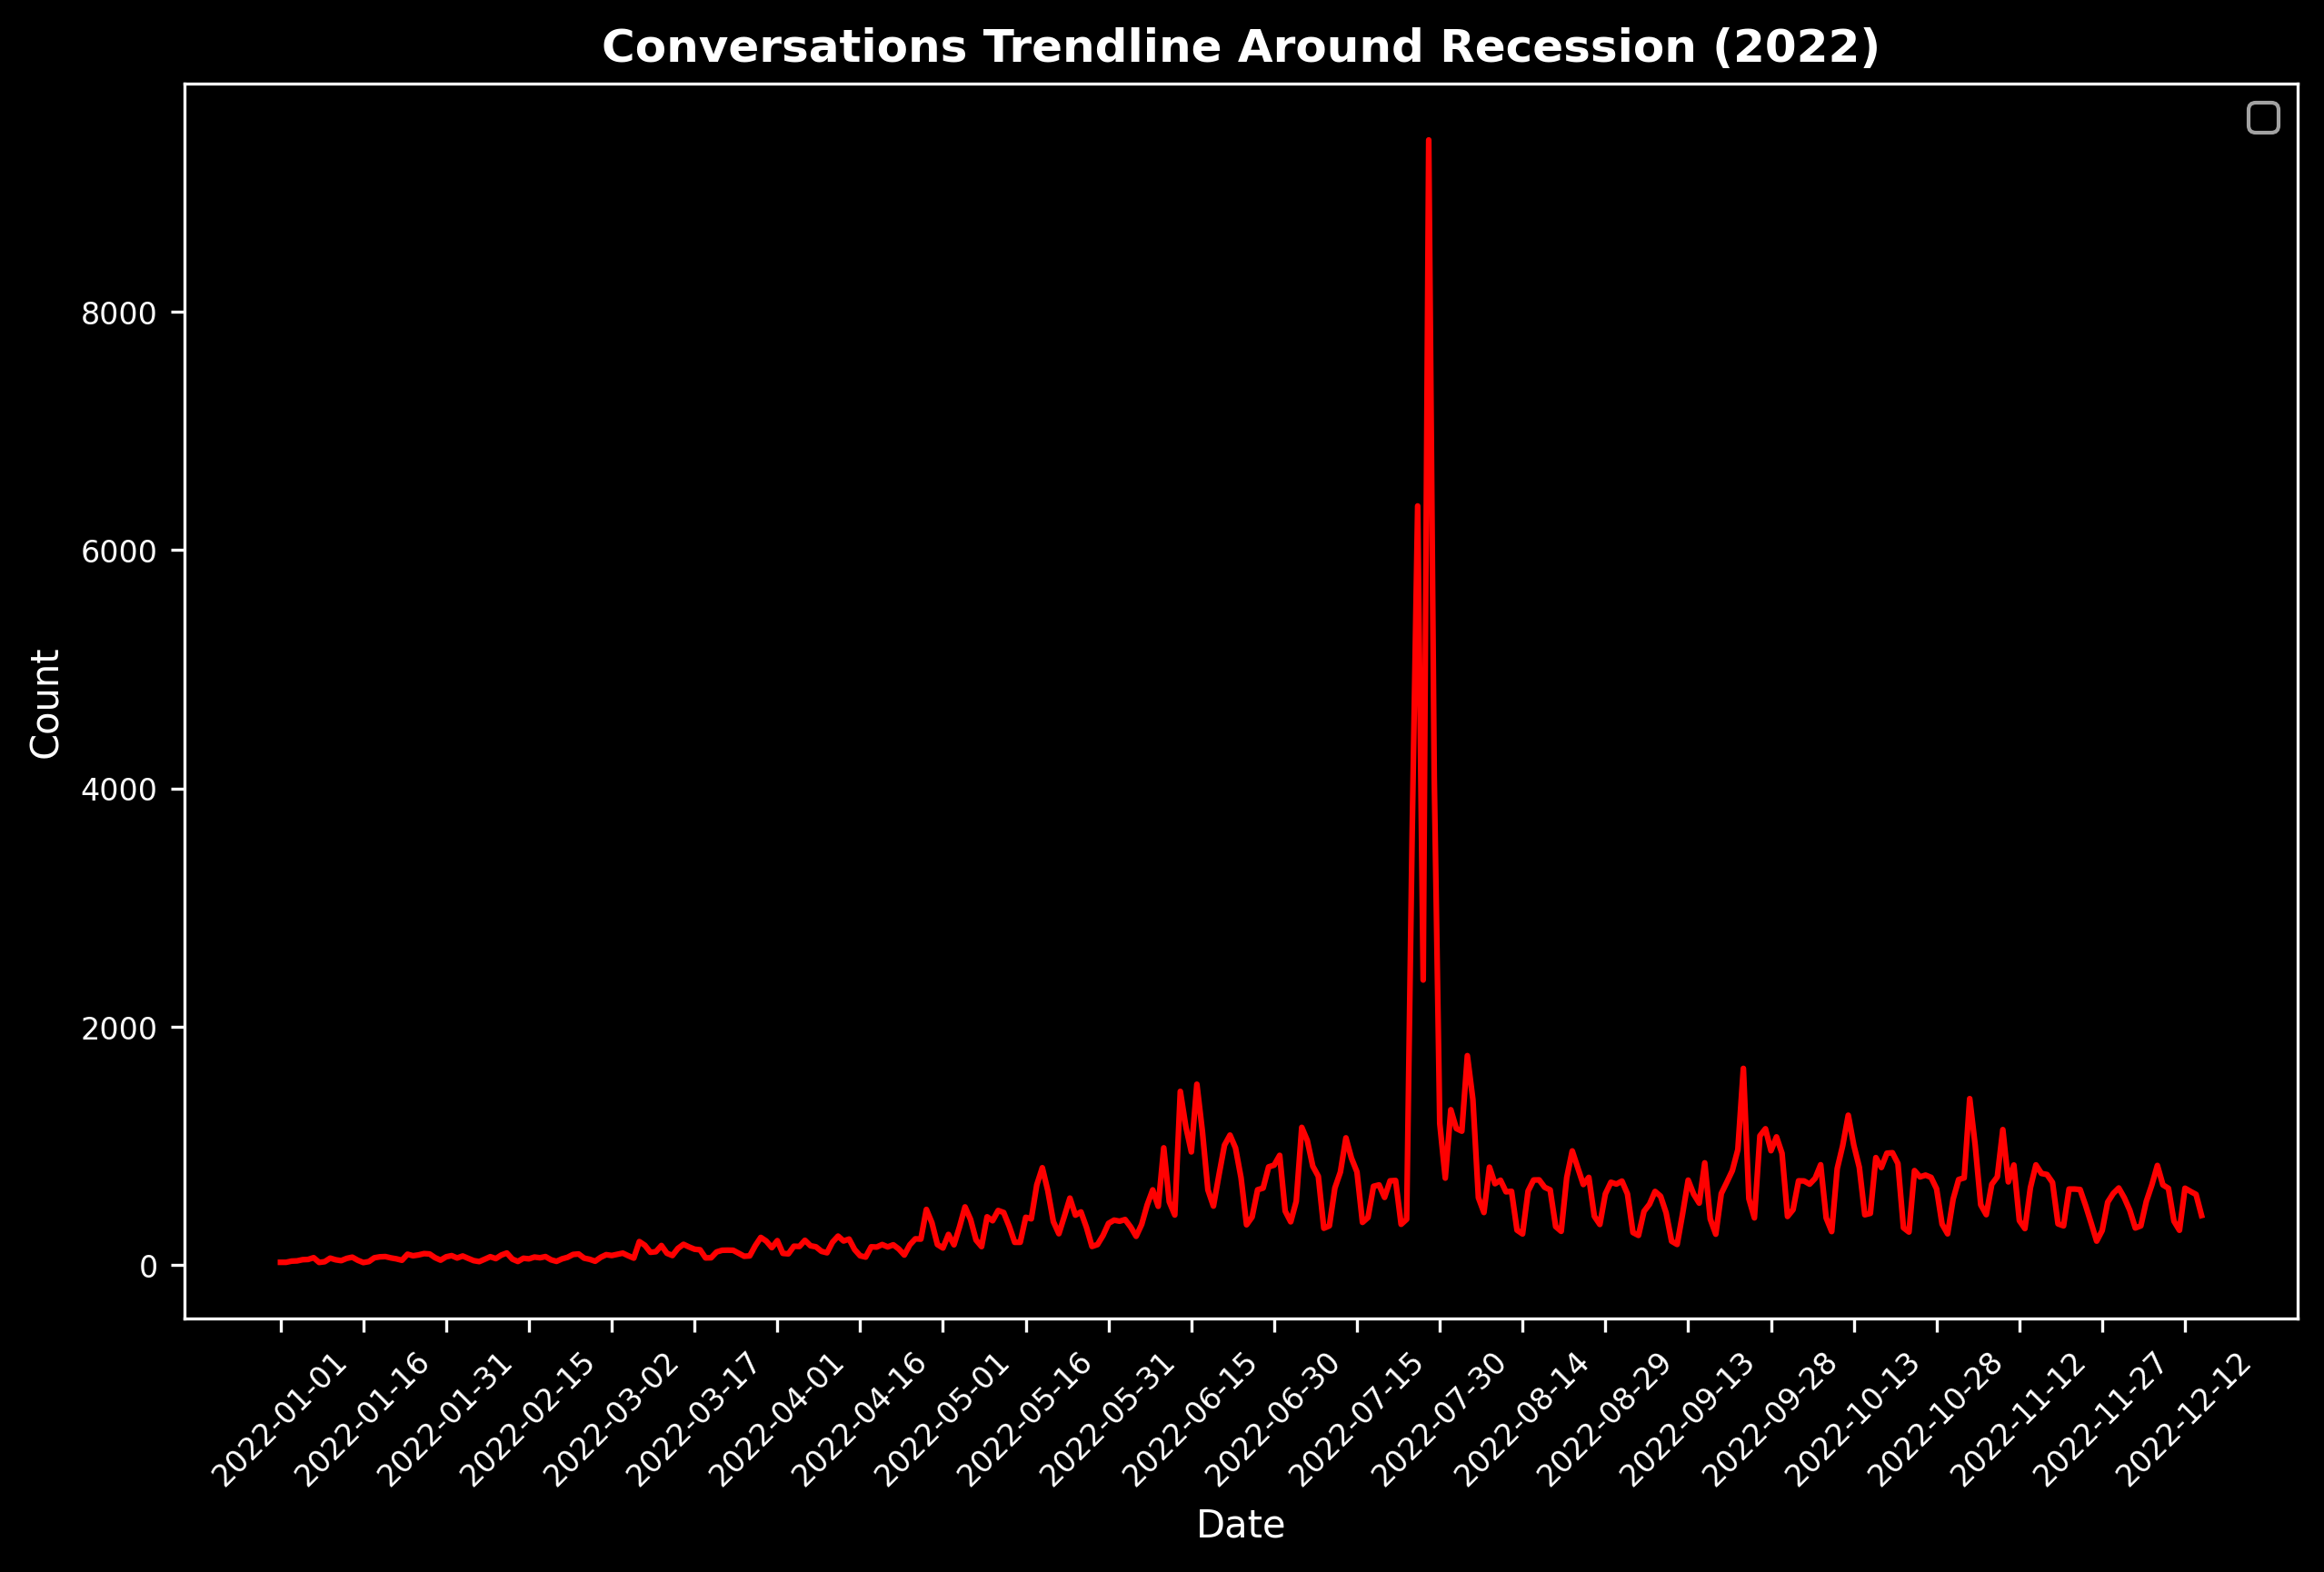

In [43]:
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

plt.style.use('dark_background')
plt.figure(figsize=(10,6), dpi=300)

plt.xlabel("Date", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Conversations Trendline Around Recession (2022)", fontsize=12, weight="bold")
plt.tick_params(labelsize=8)
plt.plot(recession_counts.Date, recession_counts.Count, color="red")
plt.xticks(recession_counts.Date[::15], rotation=45)
plt.legend()
plt.show()

`Note`: The significant spike in influencers' discussions on "Recession" was noticed in the third week of June, when the US Fed raised the interest rates by 0.75%, the highest increase since 1994, to tame the mounting pressure of inflation, which reached the highest level in four decades.

#### Most Popular Tweets

Below are a few of the most popular influencer opinions captured:

`"This is Joe Biden’s recession. 100%. He owns this. And yes, we are very much in a recession."`

--- Eric Matheny

`"If Donald Trump were still president and U.S. gdp just contracted for a 2nd consecutive quarter, there's no way the media would not be reporting it as a recession. Instead, the left-wing media is spreading democratic propaganda to redefine recession to pretend we're not in one."`

--- Glenn Beck

`"So the white house says we're definitely not in a recession because we're creating jobs. But according to labor data, we didn't add jobs. People got second jobs. that's not healthy."`

--- Peter Schiff

In [44]:
popular_tweets = tweets_df.sort_values(by="NumofLikes", ascending=False).head(5)
popular_tweets

,UserName,Date,NumofFollowers,Location,NumofLikes,Content
99800,EricMMatheny,2022-07-28,276981,Florida,15257,this is joe biden’s recession. 100%. he owns t...
72608,CerfiaFR,2022-08-23,448109,France,10488,🇪🇺🇺🇸 historique | pour la première fois depuis...
125237,CerfiaFR,2022-07-12,448113,France,10403,🇺🇸🇪🇺 historique | pour la première fois depuis...
115649,glennbeck,2022-07-25,1599568,"Dallas, TX. Rockies, NYC.",9655,so the white house says we're definitely not i...
99961,PeterSchiff,2022-07-28,886592,NaN,8590,if #donaldtrump were still president and u.s. ...


#### What are influencers talking about from quarter to quarter?

- Key words change from quarter to quarter

In [82]:
#season 1 + season 2
Q12 = tweets_df[tweets_df["Date"]<="2022-06-30"]
frequent_words_Q12 = frequent_words(Q12)
frequent_words_Q12

,word,count
0,recession,39767
32,inflation,13387
115,economy,6471
1467,edition,6451
438,will,4811
...,...,...
210,times,404
59,day,403
610,potus,403
3191,esf,401


In [85]:
#season 3 + season 4
Q34 = tweets_df[tweets_df.Date > "2022-06-30"]
frequent_words_Q34 = frequent_words(Q34)
frequent_words_Q34

,word,count
32,recession,124916
21,inflation,34090
9,economy,17302
27,will,12745
39,fed,10171
...,...,...
1573,prepare,1164
137,worse,1155
1303,businesses,1154
896,downturn,1146


In [ ]:
quarter_change = frequent_words_Q12.merge(frequent_words_Q34, on="word", how="inner")
quarter_change["growth"] = (quarter_change["count_y"] - quarter_change["count_x"]  )/quarter_change["count_x"]
quarter_change = quarter_change.rename(columns={"count_x": "count_Q12", "count_y": "count_Q34"})

#Only keep the first 40 keywords
quarter_change = quarter_change.sort_values(by=["growth"], ascending=False).head(40)

#measure the key words importance 
importances = []
tmp = frequent_words(tweets_df)
for word in quarter_change[["word"]].values:
  importances.append(tmp[tmp.word == word[0]].reset_index()["count"][0]/sum(tmp["count"].to_list()))

quarter_change["importance"] = importances
quarter_change

Reference: https://iot-analytics.com/what-ceos-talked-about-q2-2022/


Summary:
- Five themes noticeably gained traction in both Q12 and Q34, i.e., the stock market, layoffs, inflation, fed, GFC.
- Other topic that are decreasing in importance include the housing market and cryto.




### Sentiment Analysis Toward Recession

- General sentiment
- Sentiment difference between locations

In [5]:
# !pip install transformers

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [8]:
def score(x):
  text = preprocess(x)
  encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  return np.argsort(scores)[-1]

tweets_df["Sentiment_score"] = tweets_df["Content"].map(lambda x: score(x))

In [10]:
# tweets_df = pd.read_csv("gdrive/MyDrive/tweets/data/tweets.csv", sep="\t")
tweets_df

,UserName,Date,NumofFollowers,Location,NumofLikes,Content,Sentiment_score
0,8FIGURES_app,2022-12-15,1,NaN,0,wondering what happens to fed’s policy once th...,0
1,peter_mcgahan,2022-12-15,28195,Ireland,6,jeremy hunt’s autumn budget statement basicall...,0
2,MTSInsights,2022-12-15,1263,NaN,0,"""our preferred 10-year/1-year treasury yield s...",1
3,meetkumardec,2022-12-15,32,NaN,1,194 from 21\nmore than 9 x\nnifty 18600 pe \n#...,1
4,InvariantPersp1,2022-12-15,4684,NaN,1,#recession ... #crypto bubble edition\n\njim c...,1
...,...,...,...,...,...,...,...
176854,InvariantPersp1,2022-01-01,4685,NaN,4,#recession ... #fed pushing on a string editio...,1
176855,InvariantPersp1,2022-01-01,4685,NaN,2,#recession ... #gfc2 china #debt #bubble editi...,1
176856,InvariantPersp1,2022-01-01,4685,NaN,1,#recession ... #tech &amp; #crypto #bubbles ed...,1
176857,InvariantPersp1,2022-01-01,4685,NaN,1,#recession ... #gfc2 #globaltrade edition\n\nf...,1


#### Sentiment by topics


Popular topics = [`inflation`, `fed`, `biden`, `crypto`, `stockmarket`, `housing`, `layoff`, `investing`]

In [25]:
popular_topics = ["inflation", "fed", "biden", "crypto", "stockmarket", "housing", "layoff", "investing"]
sentiments_by_topic = {}
for topic in popular_topics:
  tmp = tweets_df[tweets_df["Content"].str.contains(topic)] #create a temporary table for storing filtered records related to specific topics
  sentiments_by_topic[topic] = tmp.groupby("Sentiment_score").count().reset_index()[["Sentiment_score", "UserName"]].rename(columns={"UserName":"Count"}).Count.to_list()

In [26]:
sentiments_by_topic #the items in the list stand for the number of negative/neutral/positive tweets related to specific topics

{'inflation': [16571, 27187, 3006],
 'fed': [5518, 13126, 1146],
 'biden': [6967, 5166, 684],
 'crypto': [1566, 5315, 1217],
 'stockmarket': [2646, 7893, 1176],
 'housing': [1276, 4161, 296],
 'layoff': [1448, 4970, 295],
 'investing': [867, 3279, 757]}

#### Examples

In [49]:
negative_examples = tweets_df[tweets_df["Sentiment_score"]==0].sort_values(by="NumofLikes", ascending=False).head(10)
neutral_examples = tweets_df[tweets_df["Sentiment_score"]==1].sort_values(by="NumofLikes", ascending=False).head(10)
positive_examples = tweets_df[tweets_df["Sentiment_score"]==2].sort_values(by="NumofLikes", ascending=False).head(10)

negative_examples.to_csv("negative_examples.csv", sep="\t", index=False)
neutral_examples.to_csv("neutral_examples.csv", sep="\t", index=False)
positive_examples.to_csv("positive_examples.csv", sep="\t", index=False)